In [23]:
cd ~/Documents/Projects/SALTED

/Users/soonnanwee/Documents/Projects/SALTED


In [24]:
filepath = 'data/raw_data/dataset_rossi.csv'
# interval_filepath = 'data/raw_data/dataset_interval_diabetes.csv'
import pandas as pd
datatest = pd.read_csv(filepath, index_col=0)

In [25]:
datatest

,week,arrest,fin,age,race,wexp,mar,paro,prio
0,20,1,0,27,1,0,0,1,3
1,17,1,0,18,1,0,0,1,8
2,25,1,0,19,0,1,0,1,13
3,52,0,1,23,1,1,1,1,1
4,52,0,0,19,0,1,0,1,3
...,...,...,...,...,...,...,...,...,...
427,52,0,1,31,0,1,0,1,3
428,52,0,0,20,1,0,0,1,1
429,52,0,1,20,1,1,1,1,1
430,52,0,0,29,1,1,0,1,3


In [3]:
import numpy as np 
interval_data = False

if interval_data: 
    nodiff = np.where(datatest['right'] - datatest['left'] == 0, 1, 0)
    print(np.shape(datatest)[0])
    np.sum(nodiff)

In [26]:
from src.modules.estimators import univariateEstimator

# time = datatest['time'].values
# event = datatest['event'].values
time = datatest['week'].values
event = datatest['arrest'].values

# time = data_y["Survival_in_days"]
# event = data_y["Status"]
# time_left = datatest['left']
# time_right = datatest['right']
# event_f = datatest['gender'].map({'male': 0, 'female': 1})

# estimGirl =  univariateEstimator.univariateEstimator(times = time_right, events = event_f, times_enter = time_left)

estimator = univariateEstimator.univariateEstimator(times = time, events = event)

In [27]:
estimator.fit()

In [33]:
np.percentile(estimator.surv_prob, 50)

0.8839907192575407

In [49]:

    
# estimator.surv_prob

50


In [50]:
estimator.timepoints

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 42, 43, 44, 45, 46, 47, 48, 49, 50, 52])

Text(0.5, 0, 'time $t$')

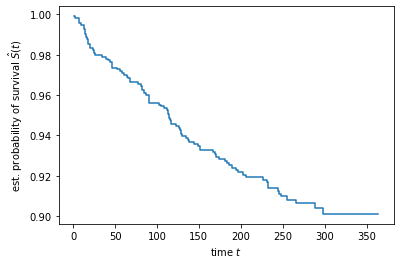

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
from sksurv.nonparametric import kaplan_meier_estimator

time, survival_prob = kaplan_meier_estimator(event, time)
plt.step(time, survival_prob, where="post")
plt.ylabel("est. probability of survival $\hat{S}(t)$")
plt.xlabel("time $t$")

Text(0.5, 0, 'time $t$')

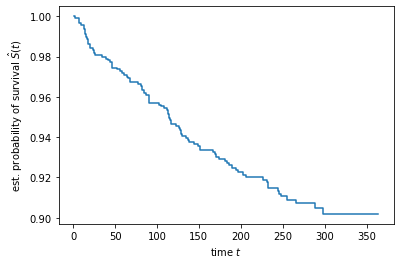

In [9]:
import matplotlib.pyplot as plt
plt.step(estimator.timepoints, estimator.surv_prob, where="post")
plt.ylabel("est. probability of survival $\hat{S}(t)$")
plt.xlabel("time $t$")

In [10]:
#median survival time is calculated as the smallest survival time for which the survival probability functio is less than or equal to 0.5
# --survival_prob

np.where(survival_prob < 0.5, 1, 0)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
from sksurv.nonparametric import _compute_counts
check_times, check_n_events, n_at_risk = _compute_counts(data_y['Status'], data_y['Survival_in_days']) 

In [ ]:
print(len(n_at_risk))
n_at_risk

In [ ]:
print(check_times)
print(estimBoy.timepoints)

In [ ]:
print(len(estimBoy.n_at_risk))
estimBoy.n_at_risk - n_at_risk

In [ ]:
np.sum(data_y["Status"]), len(data_y["Status"])

In [ ]:
len(None)